# Práctico 2 - Procesamiento Digital de Imágenes

In [1]:
import imageio
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
MAT_RGB2YIQ = np.array([[0.299, 0.587, 0.114],
                        [0.596,-0.275,-0.321],
                        [0.211,-0.523, 0.311]])

def apply_matrix(img, M):
    return np.matmul(img.reshape((-1,3)), M.T).reshape(img.shape)

def rgb2yiq(img):
    return apply_matrix(img, MAT_RGB2YIQ)

def yiq2rgb(img):
    return apply_matrix(img, np.linalg.inv(MAT_RGB2YIQ))

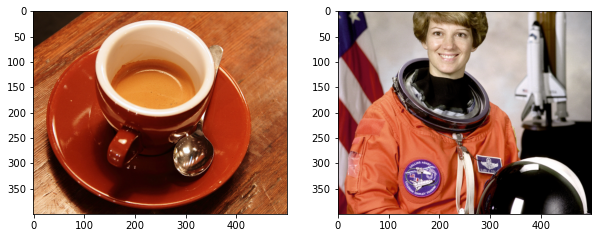

In [3]:
img_1 = imageio.imread('imageio:coffee.png')[:, 50:550, :]/255
img_2 = imageio.imread('imageio:astronaut.png')[56:456, 6:506, :]/255

fig, axes = plt.subplots(1, 2, figsize=(10,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)

In [4]:
## 1. Aritmética de pixels

#Implementar las siguientes operaciones aritméticas:

#1. Suma y diferencia clampeada en RGB (la suma ya está hecha en el primer ejemplo)
#2. Suma y diferencia promediada en RGB
#3. Suma y diferencia en YIQ
#4. If-lighter / If-darker

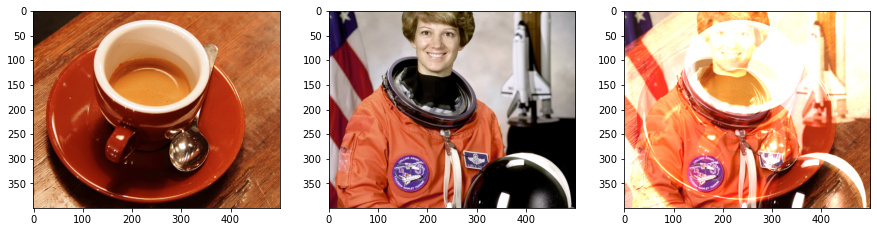

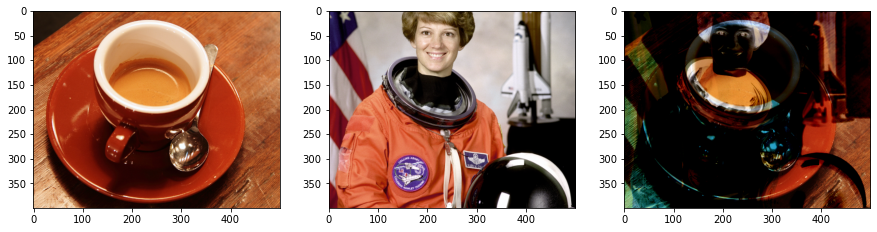

In [5]:
# Implementación de suma clampleada en RGB
img_sum_campl_RGB = np.clip(img_1 + img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_campl_RGB)

# Implementación de resta campleada en RGB

img_res_campl_RGB = np.clip(img_1 - img_2, 0, 1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_res_campl_RGB)

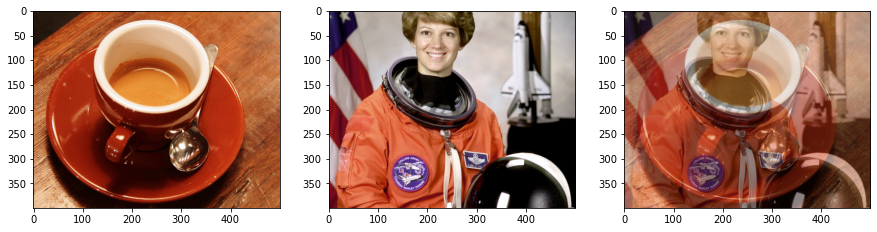

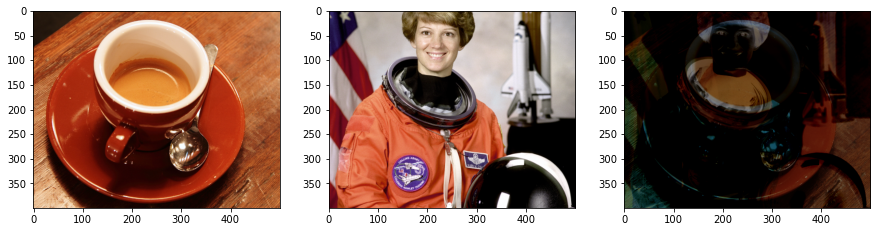

In [6]:
# Implementación de suma promediada en RGB
img_sum_prom_RGB = np.clip((img_1 + img_2)/2,0,255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_prom_RGB)


# Implementación de resta promediada en RGB

img_rest_prom_RGB = np.clip((img_1 - img_2)/2,0,255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_rest_prom_RGB)


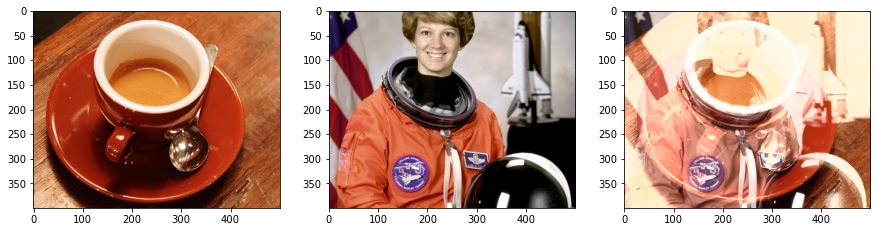

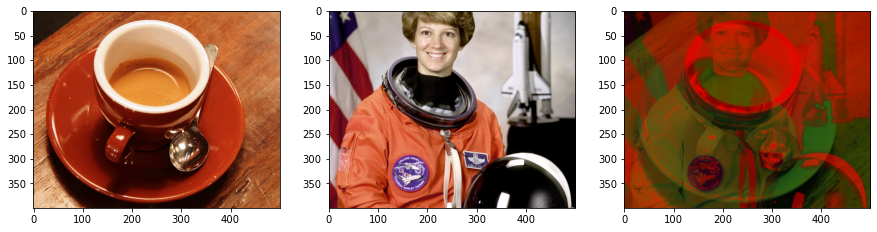

In [7]:
# Implementación de suma campleada en YIQ

img1_YIQ = rgb2yiq(img_1)
img2_YIQ = rgb2yiq(img_2)

img_sum_camp_YIQ=img1_YIQ # existe una manera mas apropiada de crear el "esqueleto" de la matriz? simplemente para luego poder 
#asignarle valores.

img_sum_camp_YIQ[:,:,0]=np.clip(img1_YIQ[:,:,0] + img2_YIQ[:,:,0],0,1)
img_sum_camp_YIQ[:,:,1]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,1]+img2_YIQ[:,:,0]*img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,1)
img_sum_camp_YIQ[:,:,2]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,2]+img2_YIQ[:,:,0]*img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,1)


img_sum_camp_YIQ = np.clip(yiq2rgb(img_sum_camp_YIQ),0,1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_camp_YIQ)

# Implementación de suma promediada en YIQ

img1_YIQ = rgb2yiq(img_1)
img2_YIQ = rgb2yiq(img_2)

img_sum_camp_YIQ=img1_YIQ # existe una manera mas apropiada de crear el "esqueleto" de la matriz? simplemente para luego poder 
#asignarle valores.

img_sum_camp_YIQ[:,:,0]=np.clip((img1_YIQ[:,:,0] + img2_YIQ[:,:,0])/2,0,255)
img_sum_camp_YIQ[:,:,1]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,1]+img2_YIQ[:,:,0]*img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,255)
img_sum_camp_YIQ[:,:,2]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,2]+img2_YIQ[:,:,0]*img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_camp_YIQ)




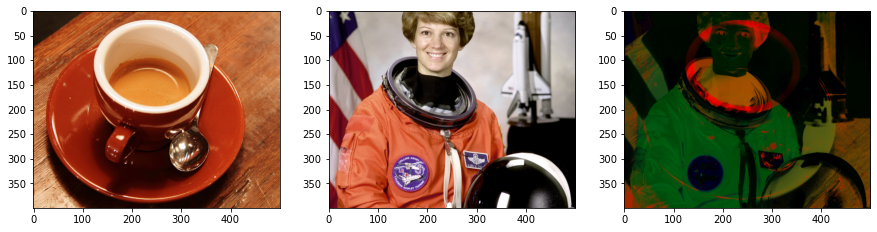

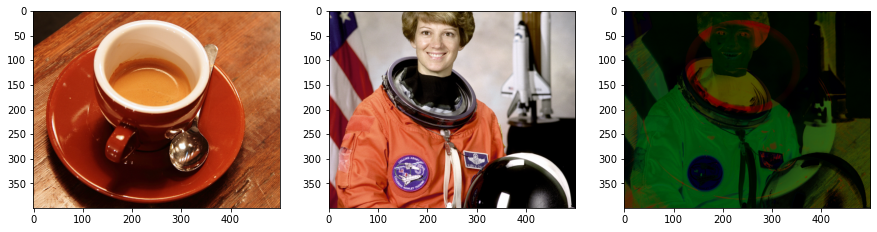

In [8]:
# Implementación de resta campleada en YIQ

img1_YIQ = rgb2yiq(img_1)
img2_YIQ = rgb2yiq(img_2)

img_sum_camp_YIQ=img1_YIQ # existe una manera mas apropiada de crear el "esqueleto" de la matriz? simplemente para luego poder 
#asignarle valores.

img_sum_camp_YIQ[:,:,0]=np.clip(img1_YIQ[:,:,0] - img2_YIQ[:,:,0],0,1)
img_sum_camp_YIQ[:,:,1]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,1]+img2_YIQ[:,:,0]*img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,1)
img_sum_camp_YIQ[:,:,2]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,2]+img2_YIQ[:,:,0]*img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,1)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_camp_YIQ)

# Implementación de resta promediada en YIQ

img1_YIQ = rgb2yiq(img_1)
img2_YIQ = rgb2yiq(img_2)

img_sum_camp_YIQ=img1_YIQ # existe una manera mas apropiada de crear el "esqueleto" de la matriz? simplemente para luego poder 
#asignarle valores.

img_sum_camp_YIQ[:,:,0]=np.clip((img1_YIQ[:,:,0] - img2_YIQ[:,:,0])/2,0,255)
img_sum_camp_YIQ[:,:,1]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,1]+img2_YIQ[:,:,0]*img2_YIQ[:,:,1])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,255)
img_sum_camp_YIQ[:,:,2]=np.clip((img1_YIQ[:,:,0]*img1_YIQ[:,:,2]+img2_YIQ[:,:,0]*img2_YIQ[:,:,2])/(img1_YIQ[:,:,0]+img2_YIQ[:,:,0]),0,255)

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_sum_camp_YIQ)

    

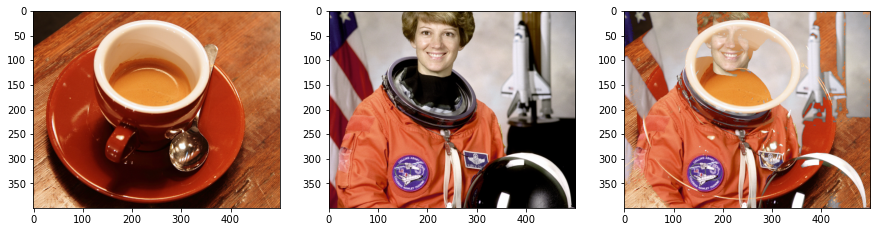

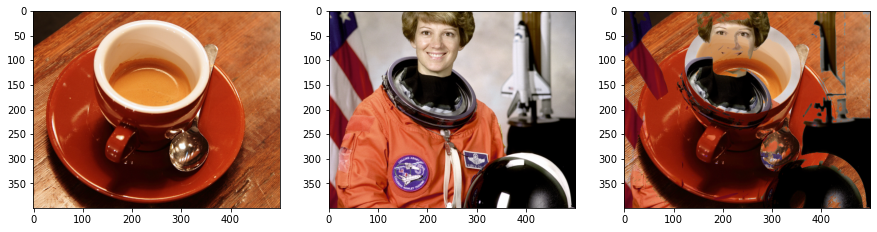

In [37]:
img1_YIQ = rgb2yiq(img_1)
img2_YIQ = rgb2yiq(img_2)

img_3 = np.zeros(img_1.shape)

# apuntes auxiliares
#mascaras y arrays:

#x = np.array([1,2,3,4])
#y = np.array([True,True,False,True]) # la máscara decide en que valores se aplica la condición que se quiera.
#z = y[x]=-1 # se aplica la máscara, según los valores que esta decida, se asigna 1 donde corresponda.
#z

#If-ligther

mask1_2 = img1_YIQ[:,:,0] >= img2_YIQ[:,:,0]
mask2_1 = img2_YIQ[:,:,0] > img1_YIQ[:,:,0]

img_3[mask1_2] = img_1[mask1_2]
img_3[mask2_1] = img_2[mask2_1]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)


#If-darker

mask1_2 = img1_YIQ[:,:,0] <= img2_YIQ[:,:,0]
mask2_1 = img2_YIQ[:,:,0] < img1_YIQ[:,:,0]

img_3[mask1_2] = img_1[mask1_2]
img_3[mask2_1] = img_2[mask2_1]

fig, axes = plt.subplots(1, 3, figsize=(15,5))
axes[0].imshow(img_1)
axes[1].imshow(img_2)
axes[2].imshow(img_3)






In [ ]:
# Ayudita para implementar if-lighther e if-darker:
# A continuación creo dos arreglos x e y del mismo tamaño, donde x tiene los valores que se muestran e y son todos ceros
# Luego, al arreglo "y" le asigno 1 en los lugares donde x es estrictamente mayor a 2

x = np.array([[1,2,1,2],
              [1,2,3,2],
              [2,3,3,1],
              [1,2,3,2]])

y = np.zeros((4,4))

print(y)  # Muestro el valor de y antes de ser modificado

y[x > 2] = 1

print('')
print(y)  # Muestro el valor de y luego de ser modificado